# CEV可視化ノートブック

保存されたpklファイルからCEVプロットを作成

In [1]:
import pickle
import numpy as np
from cev_solver.cev_analysis import run_cev_analysis
import matplotlib.pyplot as plt

In [2]:
# 保存されたresultsを読み込み（最新のディレクトリを指定）
import os
result_dirs = [d for d in os.listdir('results') if d.startswith('results_')]
latest_dir = max(result_dirs)
print(f"Loading from: results/{latest_dir}")

with open(f'results/{latest_dir}/psi_50to25_by25T_full.pkl', 'rb') as f:
    results = pickle.load(f)
    
initial_result, final_result, K_path, opt_indexes, aprimes, value_functions = results

Loading from: results/results_20251108_114241


In [3]:
# TransitionSettingを再作成（CEV計算に必要）
from olg_solver.transition_setting import TransitionSetting

tr_setting = TransitionSetting(
    NT=100, TT=25, psi_ini=0.5, psi_fin=0.25
)

# mu_distsを計算（前向き分布更新）
from olg_transition_solver.forward_transition import solve_forward_transition
mu_dists = solve_forward_transition(tr_setting, initial_result.hp, opt_indexes, initial_result.mu_dist_box)

  分布更新: 期間 1/99
  分布更新: 期間 2/99
  分布更新: 期間 3/99
  分布更新: 期間 4/99
  分布更新: 期間 5/99
  分布更新: 期間 6/99
  分布更新: 期間 7/99
  分布更新: 期間 8/99
  分布更新: 期間 9/99
  分布更新: 期間 10/99
  分布更新: 期間 11/99
  分布更新: 期間 12/99
  分布更新: 期間 13/99
  分布更新: 期間 14/99
  分布更新: 期間 15/99
  分布更新: 期間 16/99
  分布更新: 期間 17/99
  分布更新: 期間 18/99
  分布更新: 期間 19/99
  分布更新: 期間 20/99
  分布更新: 期間 21/99
  分布更新: 期間 22/99
  分布更新: 期間 23/99
  分布更新: 期間 24/99
  分布更新: 期間 25/99
  分布更新: 期間 26/99
  分布更新: 期間 27/99
  分布更新: 期間 28/99
  分布更新: 期間 29/99
  分布更新: 期間 30/99
  分布更新: 期間 31/99
  分布更新: 期間 32/99
  分布更新: 期間 33/99
  分布更新: 期間 34/99
  分布更新: 期間 35/99
  分布更新: 期間 36/99
  分布更新: 期間 37/99
  分布更新: 期間 38/99
  分布更新: 期間 39/99
  分布更新: 期間 40/99
  分布更新: 期間 41/99
  分布更新: 期間 42/99
  分布更新: 期間 43/99
  分布更新: 期間 44/99
  分布更新: 期間 45/99
  分布更新: 期間 46/99
  分布更新: 期間 47/99
  分布更新: 期間 48/99
  分布更新: 期間 49/99
  分布更新: 期間 50/99
  分布更新: 期間 51/99
  分布更新: 期間 52/99
  分布更新: 期間 53/99
  分布更新: 期間 54/99
  分布更新: 期間 55/99
  分布更新: 期間 56/99
  分布更新: 期間 57/99
  分布更新: 期間 58/99
  分布更新: 期間 59/99
  分布更新

=== CEV分析開始 ===
CEVを計算中...
CEV計算完了
プロットを作成中...


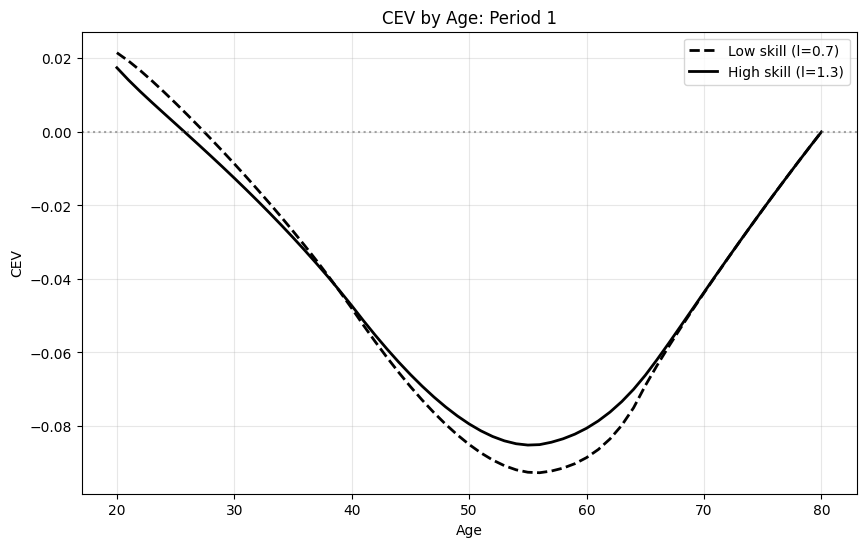

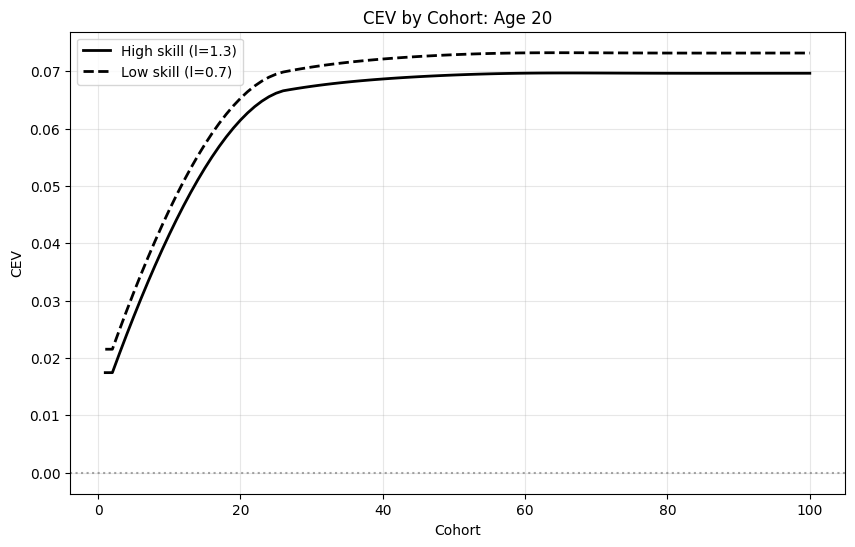

プロット完了

=== CEV分析結果サマリー ===
期間数: 100
年齢数: 61
スキル数: 2

第1期の年齢別CEV統計:
  Low skill - CEV平均: -0.0439
  High skill - CEV平均: -0.0427


In [4]:
# CEV分析とプロット実行（修正されたCEV計算を使用）
cev_results = run_cev_analysis(
    tr_setting=tr_setting,
    initial_result=initial_result, 
    value_functions=value_functions,
    mu_dists=mu_dists,
    plot_period=0,  # 第1期
    plot_age=0,     # 20歳
    show_plots=True,
    save_plots=False
)